In [29]:
import pandas as pd
import os
import folium
from folium.plugins import TimestampedGeoJson

import numpy as np

In [4]:
MAIN_PATH = r'C:\Users\thanos\Desktop\ds_challenge'
raw_df_path = os.path.join(MAIN_PATH, 'data/raw/DBdataset.csv')
raw_df = pd.read_csv(raw_df_path)

In [5]:
raw_df

,Unnamed: 0,latitude,longitude,datetime,speed_overground,stw,direction,current_ucomp,current_vcomp,draft_aft,draft_fore,comb_wind_swell_wave_height,power
0,0,43.461224,-3.769111,2022-05-30 20:14:00,9.59600,7.816667,74.3545,-0.230973,0.127614,10.080,10.0400,1.08767,1550.0
1,1,43.462276,-3.765792,2022-05-30 20:15:00,9.65000,8.366667,56.8053,-0.230283,0.126158,10.150,10.0200,1.08750,1634.0
2,2,43.463665,-3.762667,2022-05-30 20:16:00,9.95143,8.416667,52.9923,-0.229592,0.124702,10.050,10.0367,1.08733,1713.0
3,3,43.465542,-3.759250,2022-05-30 20:17:00,10.37200,9.200000,53.4552,-0.228902,0.123246,10.100,10.1550,1.08717,1790.0
4,4,43.467278,-3.756222,2022-05-30 20:18:00,10.89430,9.666667,53.5744,-0.228212,0.121790,10.185,10.3050,1.08700,1864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23194,23194,-33.931416,25.658056,2022-06-15 22:52:00,7.17742,6.675000,231.4860,-0.027571,-0.055481,10.060,9.5350,NaN,4266.0
23195,23195,-33.932793,25.656334,2022-06-15 22:53:00,7.31000,6.810000,231.3740,-0.027826,-0.055593,10.060,9.5700,NaN,4233.0
23196,23196,-33.934250,25.654291,2022-06-15 22:54:00,7.51143,7.153846,231.2800,-0.028081,-0.055704,10.065,9.5700,NaN,4200.0
23197,23197,-33.935501,25.652374,2022-06-15 22:55:00,7.67297,7.309091,229.2240,-0.028335,-0.055816,10.075,9.5950,NaN,4167.0


| Column                     | Description                                       | Units                   |
|----------------------------|---------------------------------------------------|-------------------------|
| Date_UTC                   | Datetime                                          | -                       |
| Latitude                   | Latitude in degrees                               | degrees                 |
| Longitude                  | Longitude in degrees                              | degrees                 |
| Speed_Overground          | Speed over ground                                 | knots                   |
| STW                        | Speed through water                               | knots                   |
| Draft_Aft                  | Draft in the aft of the vessel                    | meters                  |
| Draft_Fore                 | Draft in the fore of the vessel                   | meters                  |
| Direction                  | Direction of the vessel                           | Azimuth Degrees         |
| Current_Ucomp              | x-component of currents relative to true North    | knots                   |
| Current_Vcomp              | y-component of currents relative to true North    | knots                   |
| Comb_Wind_Swell_Wave_Height| Combination of wind and waves height              | meters                  |
| Power                      | Shaft power as measured from the torque sensor    | kWatt                   |

<br><br>

SOG gives the real-world speed of the vessel over the Earth's surface, while STW provides insight into the vessel's performance and efficiency in moving through the water.When Speed Overground (SOG) and Speed Through Water (STW) differ, it indicates the influence of external factors such as current, wind, or other environmental conditions affecting the vessel's movement.
<br><br>
- Currents:

If the vessel is moving through a current, the current will impact its Speed Overground. The actual speed over the ground will be a combination of the vessel's Speed Through Water and the speed of the current.
If the current is favorable (flowing in the same direction as the vessel), the SOG may be higher than STW. Conversely, if the current is adverse, the SOG may be lower than STW.
- Wind:

Wind can also affect the SOG, especially in sailing vessels. A favorable wind can provide an additional push, increasing the SOG, while adverse winds may decrease the SOG.
- Tidal Effects:

In areas with significant tidal currents, the tidal flow can impact the SOG. Tidal currents can either augment or oppose the vessel's STW, affecting the overall speed over the ground.
- Drift and Set: Drift refers to the sideways movement of the vessel due to currents. Set is the direction and speed of this sideways movement. Both drift and set contribute to the differences between SOG and STW

In [6]:
raw_df.shape

(23199, 13)

In [7]:
missing_percentage_per_column = (raw_df.isnull().mean() * 100).round(2)

# Display the result
print(missing_percentage_per_column)

Unnamed: 0                      0.00
latitude                        5.36
longitude                      11.12
datetime                        0.00
speed_overground                0.01
stw                             0.02
direction                       0.01
current_ucomp                  18.07
current_vcomp                  18.07
draft_aft                       0.36
draft_fore                      0.19
comb_wind_swell_wave_height    18.10
power                           1.50
dtype: float64


In [8]:
raw_df['datetime']

0        2022-05-30 20:14:00
1        2022-05-30 20:15:00
2        2022-05-30 20:16:00
3        2022-05-30 20:17:00
4        2022-05-30 20:18:00
                ...         
23194    2022-06-15 22:52:00
23195    2022-06-15 22:53:00
23196    2022-06-15 22:54:00
23197    2022-06-15 22:55:00
23198    2022-06-15 22:56:00
Name: datetime, Length: 23199, dtype: object

In [29]:


# # Convert 'datetime' to datetime format
# df['datetime'] = pd.to_datetime(df['datetime'])
# df = df.dropna(subset=['latitude', 'longitude'])

# # Create a Folium map centered at the first latitude and longitude entry
# map_center = [df['latitude'].iloc[0], df['longitude'].iloc[0]]
# mymap = folium.Map(location=map_center, zoom_start=14)

# # Create a Polyline connecting all points
# coordinates = list(zip(df['latitude'], df['longitude']))
# folium.PolyLine(locations=coordinates, color='red').add_to(mymap)

# # Display the map
# mymap


# # Display the map
# mymap.save('ship_path_map.html')


In [11]:
from global_land_mask import globe

In [14]:
df_no_missing_cor = raw_df.dropna(subset=['latitude', 'longitude'])

# Create a new column 'on_land' using the global_land_mask library
df_no_missing_cor['on_land'] = df_no_missing_cor.apply(lambda row: globe.is_land(row['latitude'], row['longitude']), axis=1)


C:\Users\thanos\AppData\Local\Temp\ipykernel_12268\2447080123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing_cor['on_land'] = df_no_missing_cor.apply(lambda row: globe.is_land(row['latitude'], row['longitude']), axis=1)


In [15]:
df_no_missing_cor.shape

(20600, 14)

In [27]:
def save_ship_path_graph(df, filename, use_polyline=True):
    # Convert 'datetime' to datetime format
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.dropna(subset=['latitude', 'longitude'])

    # Create a Folium map centered at the first latitude and longitude entry
    map_center = [df['latitude'].iloc[0], df['longitude'].iloc[0]]
    mymap = folium.Map(location=map_center, zoom_start=14)

    if use_polyline:
        # Create a Polyline connecting all points
        coordinates = list(zip(df['latitude'], df['longitude']))
        folium.PolyLine(locations=coordinates, color='red').add_to(mymap)
    else:
        # Add markers for each coordinate
        for index, row in df.iterrows():
            folium.Marker(location=[row['latitude'], row['longitude']], popup=row['datetime'], icon=folium.Icon(color='red')).add_to(mymap)

    # Save the map as an HTML file with the specified filename
    mymap.save(f'{filename}.html')

In [28]:
df_land = df_no_missing_cor[df_no_missing_cor['on_land'] ==True].copy()
save_ship_path_graph(df_land, 'ship_path_land', use_polyline=False)

df_sea = df_no_missing_cor[df_no_missing_cor['on_land']!=True].copy()
save_ship_path_graph(df_sea, 'ship_path_sea', use_polyline=True)

In [33]:
df_sea.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'datetime', 'speed_overground',
       'stw', 'direction', 'current_ucomp', 'current_vcomp', 'draft_aft',
       'draft_fore', 'comb_wind_swell_wave_height', 'power', 'on_land',
       'sea_currents_speed', 'sea_currents_angle'],
      dtype='object')

To create the 'sea_currents_speed' and 'sea_currents_angle' features based on the x-component ('Current_Ucomp') and y-component ('Current_Vcomp') of currents relative to true North, you can use the following formulas:

**sea_currents_speed:**
$$ sea\_currents\_speed = \sqrt{Current\_Ucomp^2 + Current\_Vcomp^2} $$

**sea_currents_angle:**
$$ sea\_currents\_angle = \arctan2(Current\_Vcomp, Current\_Ucomp) $$


In [45]:
# Assuming df is your DataFrame
df_sea['sea_currents_speed'] = np.sqrt(df_sea['current_ucomp']**2 + df_sea['current_vcomp']**2)
df_sea['sea_currents_angle'] = np.arctan2(df_sea['current_vcomp'], df_sea['current_ucomp'])

# Convert angle to degrees
df_sea['sea_currents_angle'] = np.degrees(df_sea['sea_currents_angle'])

# Display the updated DataFrame
print(df_sea[['current_ucomp', 'current_vcomp', 'sea_currents_speed', 'sea_currents_angle']].head())

df_sea['speed_difference'] = df_sea['speed_overground'] - df_sea['stw']


   current_ucomp  current_vcomp  sea_currents_speed  sea_currents_angle
1      -0.230283       0.126158            0.262576          151.284355
2      -0.229592       0.124702            0.261272          151.491575
3      -0.228902       0.123246            0.259973          151.700976
4      -0.228212       0.121790            0.258676          151.912477
5      -0.227521       0.120334            0.257383          152.126002


In [46]:
# Assuming df_sea is your DataFrame
percentiles = [.01, .1, .25, .5, .75, .90, .99]

# Calculate percentiles along with other statistics for each column
stats_df_sea = df_sea.describe(percentiles=percentiles).round(2)

# Additional percentiles
additional_percentiles = [0.0, 1.0]
additional_stats_df_sea = df_sea.describe(percentiles=additional_percentiles).round(2)

# Calculate the percentage of missing values for each column
missing_percentages = (df_sea.isnull().mean() * 100).round(2)

# Add the column with missing percentages to the DataFrame
stats_df_sea.loc['% Missing'] = missing_percentages

# Display the rounded statistics including % missing
print(stats_df_sea)


           Unnamed: 0  latitude  longitude  speed_overground       stw  \
count        19085.00  19085.00   19085.00          19085.00  19082.00   
mean         11712.29      1.25      -2.64             15.87     16.02   
std           7088.51     26.05      12.71              0.95      0.78   
min              1.00    -35.20     -18.31              5.38      4.22   
1%             191.84    -35.15     -18.24             12.99     14.11   
10%           1940.40    -32.94     -16.51             14.88     15.26   
25%           4959.00    -22.19     -13.33             15.49     15.63   
50%          11606.00     -0.21      -7.69             15.99     16.02   
75%          18057.00     25.93       7.63             16.46     16.57   
90%          21131.60     39.49      16.87             16.83     16.87   
99%          23005.16     43.95      25.27             17.38     17.15   
max          23198.00     43.99      25.79             18.13     17.48   
% Missing        0.00      0.00       

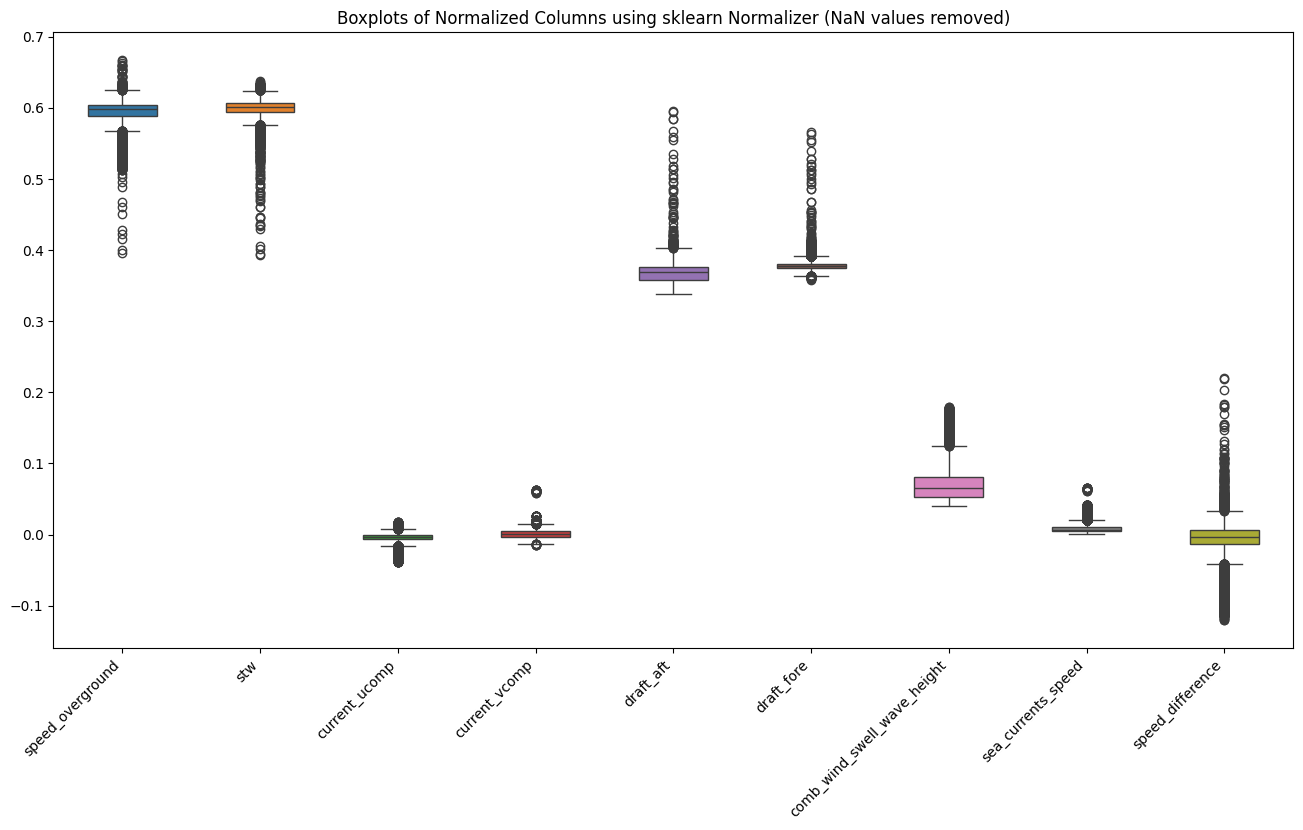

In [50]:
from sklearn.preprocessing import Normalizer
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
normalized_columns = ['speed_overground', 'stw', 'current_ucomp', 'current_vcomp',
                       'draft_aft', 'draft_fore', 'comb_wind_swell_wave_height',
                       'sea_currents_speed', 'speed_difference']

# Drop rows with missing values
df_no_missing = df_sea.dropna(subset=normalized_columns)

# Use Normalizer to normalize the columns
normalizer = Normalizer()
df_normalized = pd.DataFrame(normalizer.fit_transform(df_no_missing[normalized_columns]), columns=normalized_columns)

# Create side-by-side boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_normalized, width=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots of Normalized Columns using sklearn Normalizer (NaN values removed)')
plt.show()


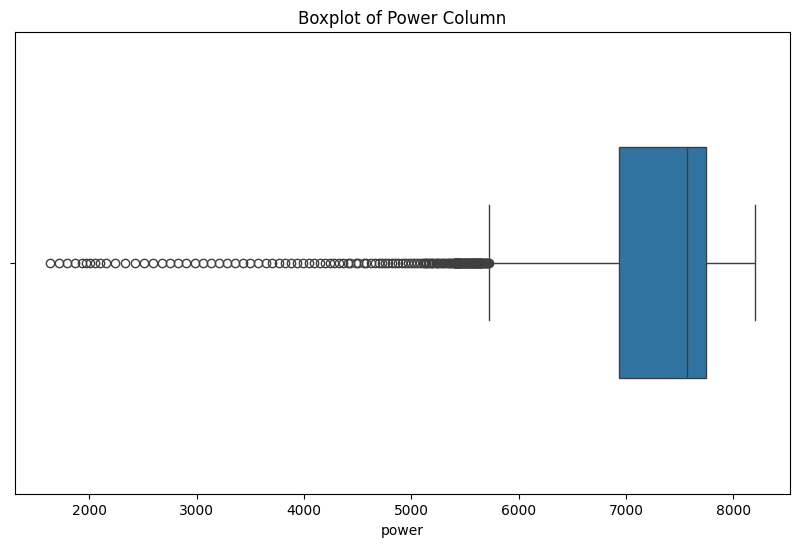

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='power', data=df_no_missing, width=0.5)
plt.title('Boxplot of Power Column')
plt.show()

# Composing an sklearn pipeline

df_raw.columns

df_raw.columns

In [52]:
raw_df.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'datetime', 'speed_overground',
       'stw', 'direction', 'current_ucomp', 'current_vcomp', 'draft_aft',
       'draft_fore', 'comb_wind_swell_wave_height', 'power'],
      dtype='object')

In [143]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class NameDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_keep=None):
        self.columns_to_keep = columns_to_keep

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.columns_to_keep is not None:
            X = X[self.columns_to_keep]
        return X

class LatLongDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Drop rows with missing latitude or longitude
        X = X.dropna(subset=['latitude', 'longitude'])

        return X

class OnLandAssigner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Assign 'on_land' column based on latitude and longitude
        X['on_land'] = X.apply(lambda row: globe.is_land(row['latitude'], row['longitude']), axis=1)

        return X
    
class SeaCurrentsCalculator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Assuming X is your DataFrame
        X['sea_currents_speed'] = np.sqrt(X['current_ucomp']**2 + X['current_vcomp']**2)
        X['sea_currents_angle'] = np.arctan2(X['current_vcomp'], X['current_ucomp'])

        # Convert angle to degrees
        X['sea_currents_angle'] = np.degrees(X['sea_currents_angle'])
        X['sea_currents_angle'] = (X['sea_currents_angle'] + 360) % 360

        return X

class SimpleImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean'):
        self.strategy = strategy

    def fit(self, X, y=None):
        # Identify numeric columns with missing values
        self.cols_with_missing = X.select_dtypes(include=[np.number]).columns[X.isnull().any()]

        if not set(self.cols_with_missing).issubset(set(X.columns)):
            raise ValueError("Columns with missing values not present in the input DataFrame.")

        return self

    def transform(self, X):
        # Apply imputation only to numeric columns with missing values
        X['power'] = self.imputer.transform(X['power'])
        return X

class DropNATransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.dropna()

In [87]:
columns_to_keep = ['latitude', 'longitude', 'datetime', 'speed_overground',
                   'stw', 'direction', 'current_ucomp', 'current_vcomp', 
                   'draft_aft', 'draft_fore', 'comb_wind_swell_wave_height', 'power']

In [100]:
raw_df

,unnamed: 0,latitude,longitude,datetime,speed_overground,stw,direction,current_ucomp,current_vcomp,draft_aft,draft_fore,comb_wind_swell_wave_height,power
0,0,43.461224,-3.769111,2022-05-30 20:14:00,9.59600,7.816667,74.3545,-0.230973,0.127614,10.080,10.0400,1.08767,1550.0
1,1,43.462276,-3.765792,2022-05-30 20:15:00,9.65000,8.366667,56.8053,-0.230283,0.126158,10.150,10.0200,1.08750,1634.0
2,2,43.463665,-3.762667,2022-05-30 20:16:00,9.95143,8.416667,52.9923,-0.229592,0.124702,10.050,10.0367,1.08733,1713.0
3,3,43.465542,-3.759250,2022-05-30 20:17:00,10.37200,9.200000,53.4552,-0.228902,0.123246,10.100,10.1550,1.08717,1790.0
4,4,43.467278,-3.756222,2022-05-30 20:18:00,10.89430,9.666667,53.5744,-0.228212,0.121790,10.185,10.3050,1.08700,1864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23194,23194,-33.931416,25.658056,2022-06-15 22:52:00,7.17742,6.675000,231.4860,-0.027571,-0.055481,10.060,9.5350,NaN,4266.0
23195,23195,-33.932793,25.656334,2022-06-15 22:53:00,7.31000,6.810000,231.3740,-0.027826,-0.055593,10.060,9.5700,NaN,4233.0
23196,23196,-33.934250,25.654291,2022-06-15 22:54:00,7.51143,7.153846,231.2800,-0.028081,-0.055704,10.065,9.5700,NaN,4200.0
23197,23197,-33.935501,25.652374,2022-06-15 22:55:00,7.67297,7.309091,229.2240,-0.028335,-0.055816,10.075,9.5950,NaN,4167.0


In [145]:
raw_df_transformed.head()

,latitude,longitude,datetime,speed_overground,stw,direction,current_ucomp,current_vcomp,draft_aft,draft_fore,comb_wind_swell_wave_height,power,on_land,sea_currents_speed,sea_currents_angle
0,43.461224,-3.769111,2022-05-30 20:14:00,9.59600,7.816667,74.3545,-0.230973,0.127614,10.080,10.0400,1.08767,1550.0,True,0.263882,151.079080
1,43.462276,-3.765792,2022-05-30 20:15:00,9.65000,8.366667,56.8053,-0.230283,0.126158,10.150,10.0200,1.08750,1634.0,False,0.262576,151.284355
2,43.463665,-3.762667,2022-05-30 20:16:00,9.95143,8.416667,52.9923,-0.229592,0.124702,10.050,10.0367,1.08733,1713.0,False,0.261272,151.491575
3,43.465542,-3.759250,2022-05-30 20:17:00,10.37200,9.200000,53.4552,-0.228902,0.123246,10.100,10.1550,1.08717,1790.0,False,0.259973,151.700976
4,43.467278,-3.756222,2022-05-30 20:18:00,10.89430,9.666667,53.5744,-0.228212,0.121790,10.185,10.3050,1.08700,1864.0,False,0.258676,151.912477


In [112]:
raw_df.shape

(23199, 13)

In [162]:
from pydantic import BaseModel, ValidationError, constr, validator

class RawInputModel(BaseModel):
    latitude: float
    longitude: float
    datetime: constr(strip_whitespace=True, max_length=50)
    speed_overground: float
    stw: float
    direction: float
    current_ucomp: float
    current_vcomp: float
    draft_aft: float
    draft_fore: float
    comb_wind_swell_wave_height: float
    power: float
    sea_currents_angle: float

    @validator("sea_currents_angle")
    def validate_sea_currents_angle(cls, value):
        if not 0.0 <= value <= 360.0:
            raise ValueError("sea_currents_angle must be between 0 and 360.")
        return value

In [163]:
class RawInputValidator:
    def __init__(self, model):
        self.model = model

    def validate(self, df):
        validated_data = []
        for _, row in df.iterrows():
            try:
                item = self.model(**row)
                validated_data.append(item.dict())
            except ValidationError as e:
                # print(f"Validation error for raw input: {e}")
                logger.error(f"Validation error for raw input: {e}")
        return pd.DataFrame(validated_data)

# Custom Transformer for Pydantic Validation
class PydanticValidator(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        validator = RawInputValidator(self.model)
        return validator.validate(X)

In [164]:
import logging
from sklearn.pipeline import Pipeline

# Set up logging configuration
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

name_dropper = NameDropper(columns_to_keep=columns_to_keep)
lat_long_dropper = LatLongDropper()
on_land_assigner = OnLandAssigner()
sea_currents_calculator = SeaCurrentsCalculator()
simple_imputer = SimpleImputer(strategy='mean')
drop_nas = DropNATransformer()
pydantic_validator = PydanticValidator(RawInputModel)

# Define the pipeline
pipeline = Pipeline([
    #('validation_transformer', validation_transformer),
    ('name_dropper', name_dropper),
    ('lat_long_dropper', lat_long_dropper),
    ('on_land_assigner', on_land_assigner),
    ('sea_currents_calculator', sea_currents_calculator),
    ('drop_nas', drop_nas),
    ('pydantic_validator', PydanticValidator(RawInputModel))
])

# Apply the pipeline to your raw_df
raw_df_transformed = pipeline.fit_transform(raw_df)